In [1]:
import numpy as np
import matplotlib.pyplot as pl
import h5py
import sys

In [30]:
def findNearest(array, value):
    array = np.asarray(array, dtype='complex')
    idx = (np.abs(array - value)).argmin()
    return idx#array[idx]

In [2]:
output_h5 = h5py.File('simulation-3.h5', 'r')

iceDepth = output_h5.attrs["iceDepth"]
iceLength = output_h5.attrs["iceLength"]
airHeight0 = output_h5.attrs["airHeight"]
#output_hdf.attrs["airHeight"] = airHeight
dx = output_h5.attrs["dx"]
dz = output_h5.attrs["dz"]

nSamples = output_h5.attrs["nSamples"]
freqLP = output_h5.attrs["freqLP"]
freqHP = output_h5.attrs["freqHP"]
nSamples = output_h5.attrs["nSamples"]
dt = output_h5.attrs["dt"]

freq_space = np.fft.fftfreq(nSamples, dt)
freq_list = np.arange(freqLP, freqHP, nSamples)

#tx pulse
tx_pulse = np.array(output_h5.get("signalPulse"))
tx_spectrum = np.array(output_h5.get("signalSpectrum"))
time_space = np.linspace(0, dt*nSamples, nSamples)

#nTX = output_h5.attrs["nTX"]
RX_depths = np.array(output_h5.get("rx_depths"))
RX_ranges = np.array(output_h5.get("rx_ranges"))
nRX_depths = len(RX_depths)

In [124]:
A1 = np.load('simulation-1.npy', 'r')
A3 = np.load('simulation-3.npy', 'r')

/home/alex/miniconda2/envs/myenv/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


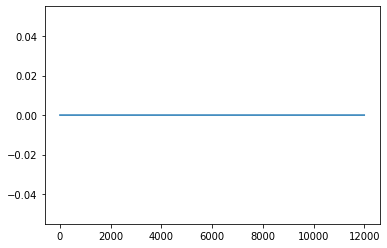

In [128]:
pl.plot(time_space, A1[10][10][10])


In [119]:
def get_bscan_parallel(spectrum_arr, hdf, R):
    rx_ranges = np.array(hdf.get("rx_ranges"))
    rx_depths = np.array(hdf.get("rx_depths"))
    nRX_depths = len(rx_depths)
    idx_range = findNearest(rx_ranges, R)
    
    nSamples = hdf.attrs["nSamples"]
    
    bscan = np.zeros(shape=(nRX_depths, nSamples), dtype='complex')
    for idx_depth in range(nRX_depths):
        spectrum = np.flip(spectrum_arr[idx_depth][idx_range][idx_depth])
        signal = np.fft.ifft(spectrum)
        bscan[idx_depth] = signal
    return bscan

def plot_bscan(bscan, hdf, R, tlim):
    nSamples = hdf.attrs["nSamples"]
    dt = hdf.attrs["dt"]
    tmax = dt*nSamples
    rx_depths = np.array(hdf.get("rx_depths"))
    rx_ranges = np.array(hdf.get("rx_ranges"))

    R_eff = rx_ranges[findNearest(rx_ranges, R)]

    fig=pl.figure(figsize=(10,10), dpi =200)
    ax = fig.add_subplot(111)
    ax.set_title('Paralell Depth Scan \n R = ' + str(R_eff))
    #ax.imshow(10*np.log10(depth_scan), extent=(0,max(tx_pulse.time_space)*1e9, max(sourceDepth_list), 0), aspect='auto')
    pmesh = ax.imshow(20*np.log10(abs(bscan)), extent=(0,tmax, max(rx_depths), 0), aspect='auto')
    cbar = pl.colorbar(pmesh)

    ax.set_ylabel('Depth TX and RX (in paralell) [m]')
    ax.set_xlabel('Time [ns]')
    ax.set_xlim(0, tlim)
    pl.show()

In [120]:
R = 400
bscan1 = get_bscan_parallel(A1, output_h5, R)
bscan3 = get_bscan_parallel(A3, output_h5, R)

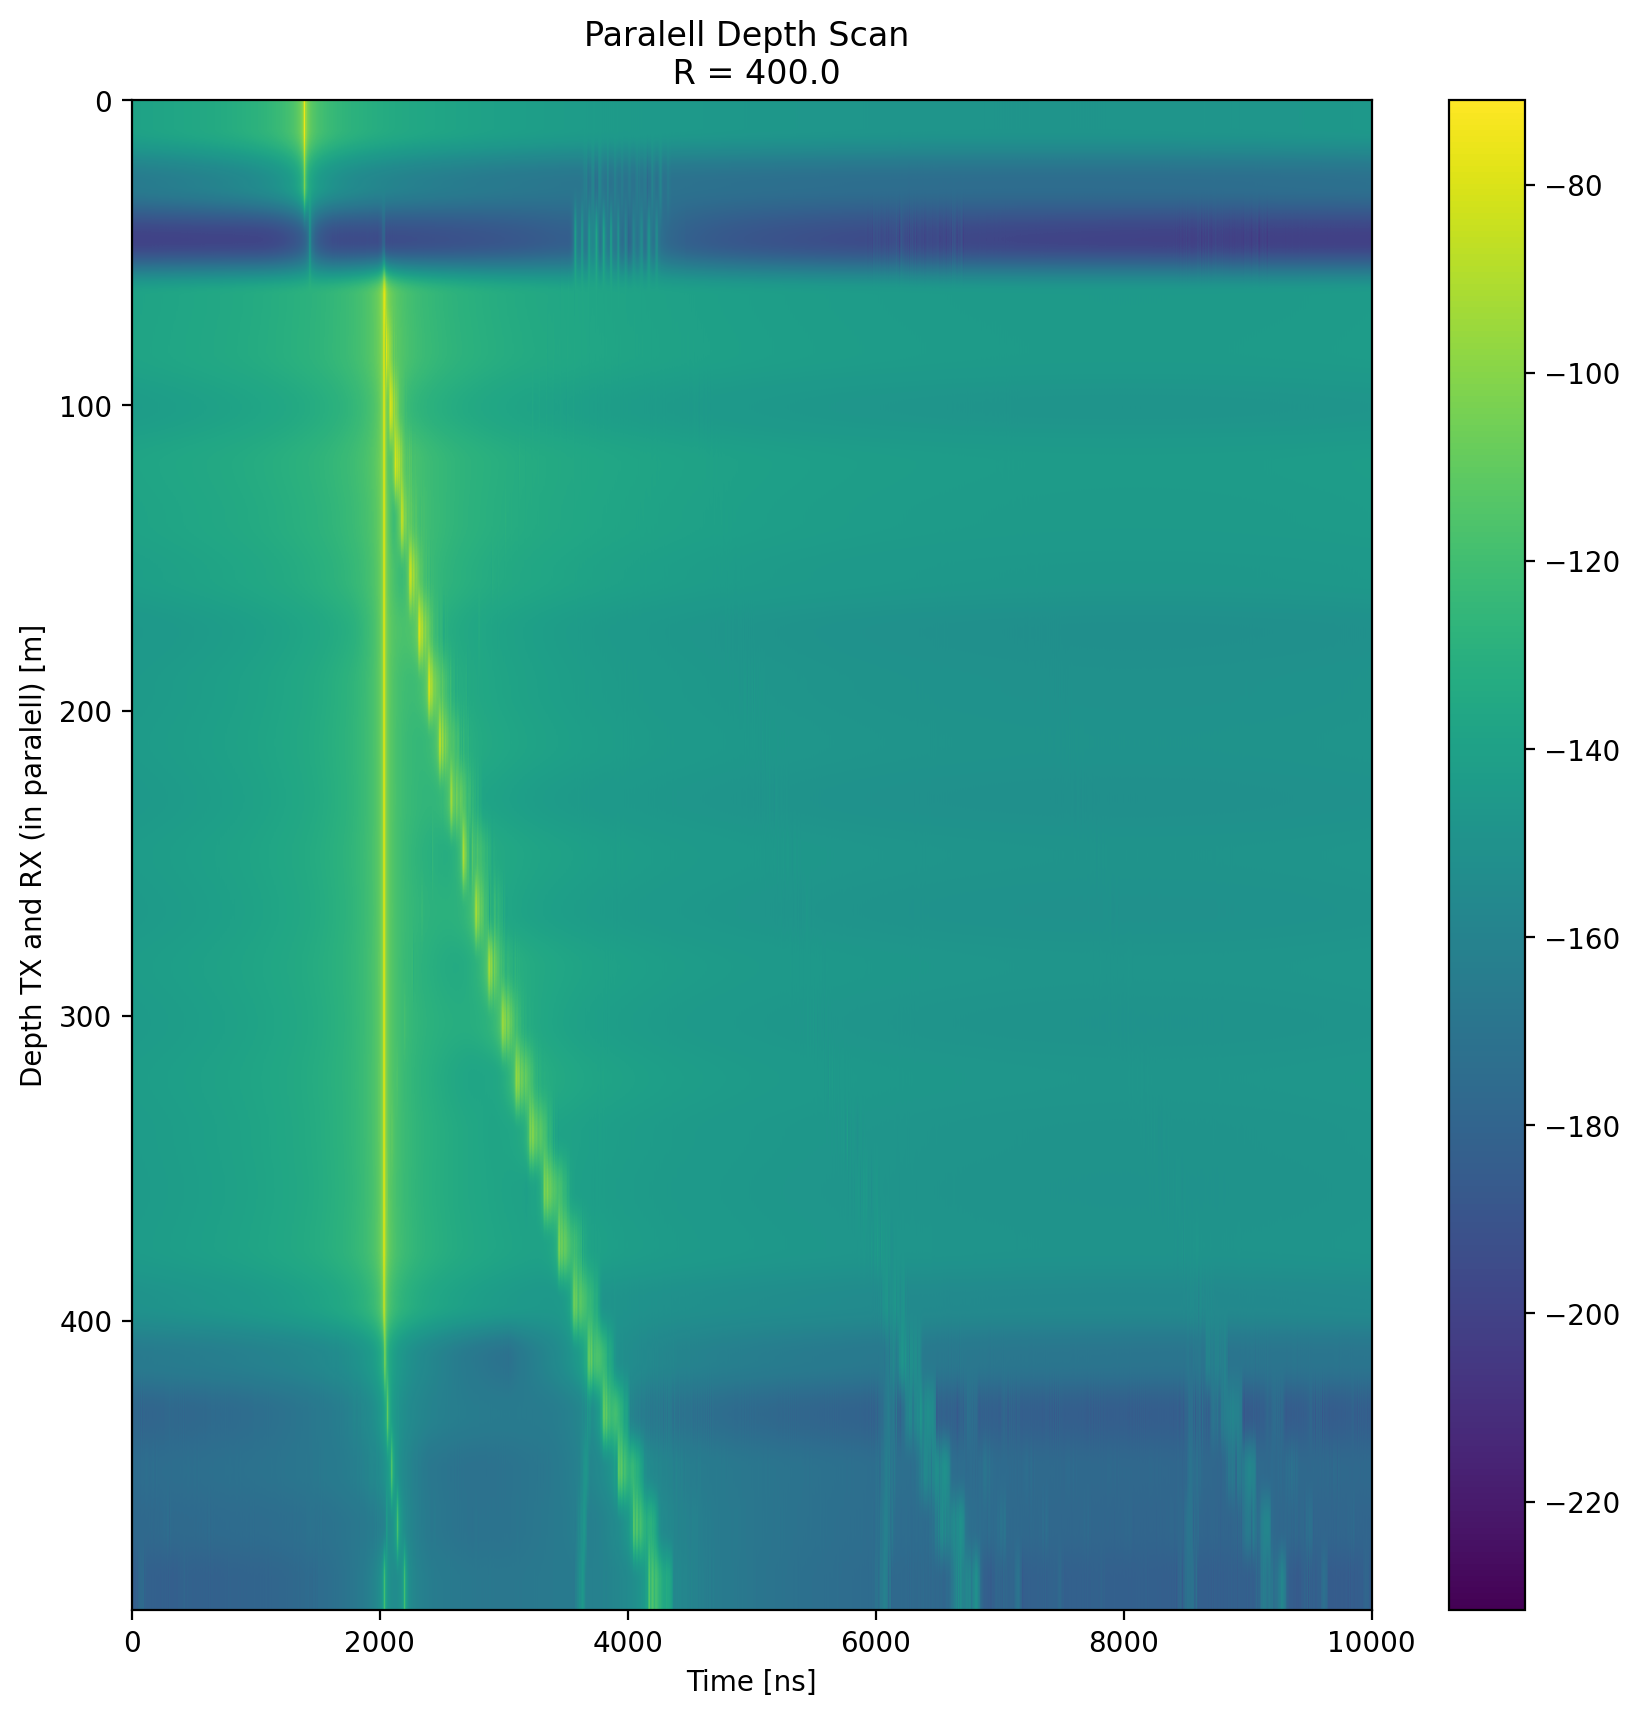

In [121]:
plot_bscan(bscan1, output_h5, R, 10000)

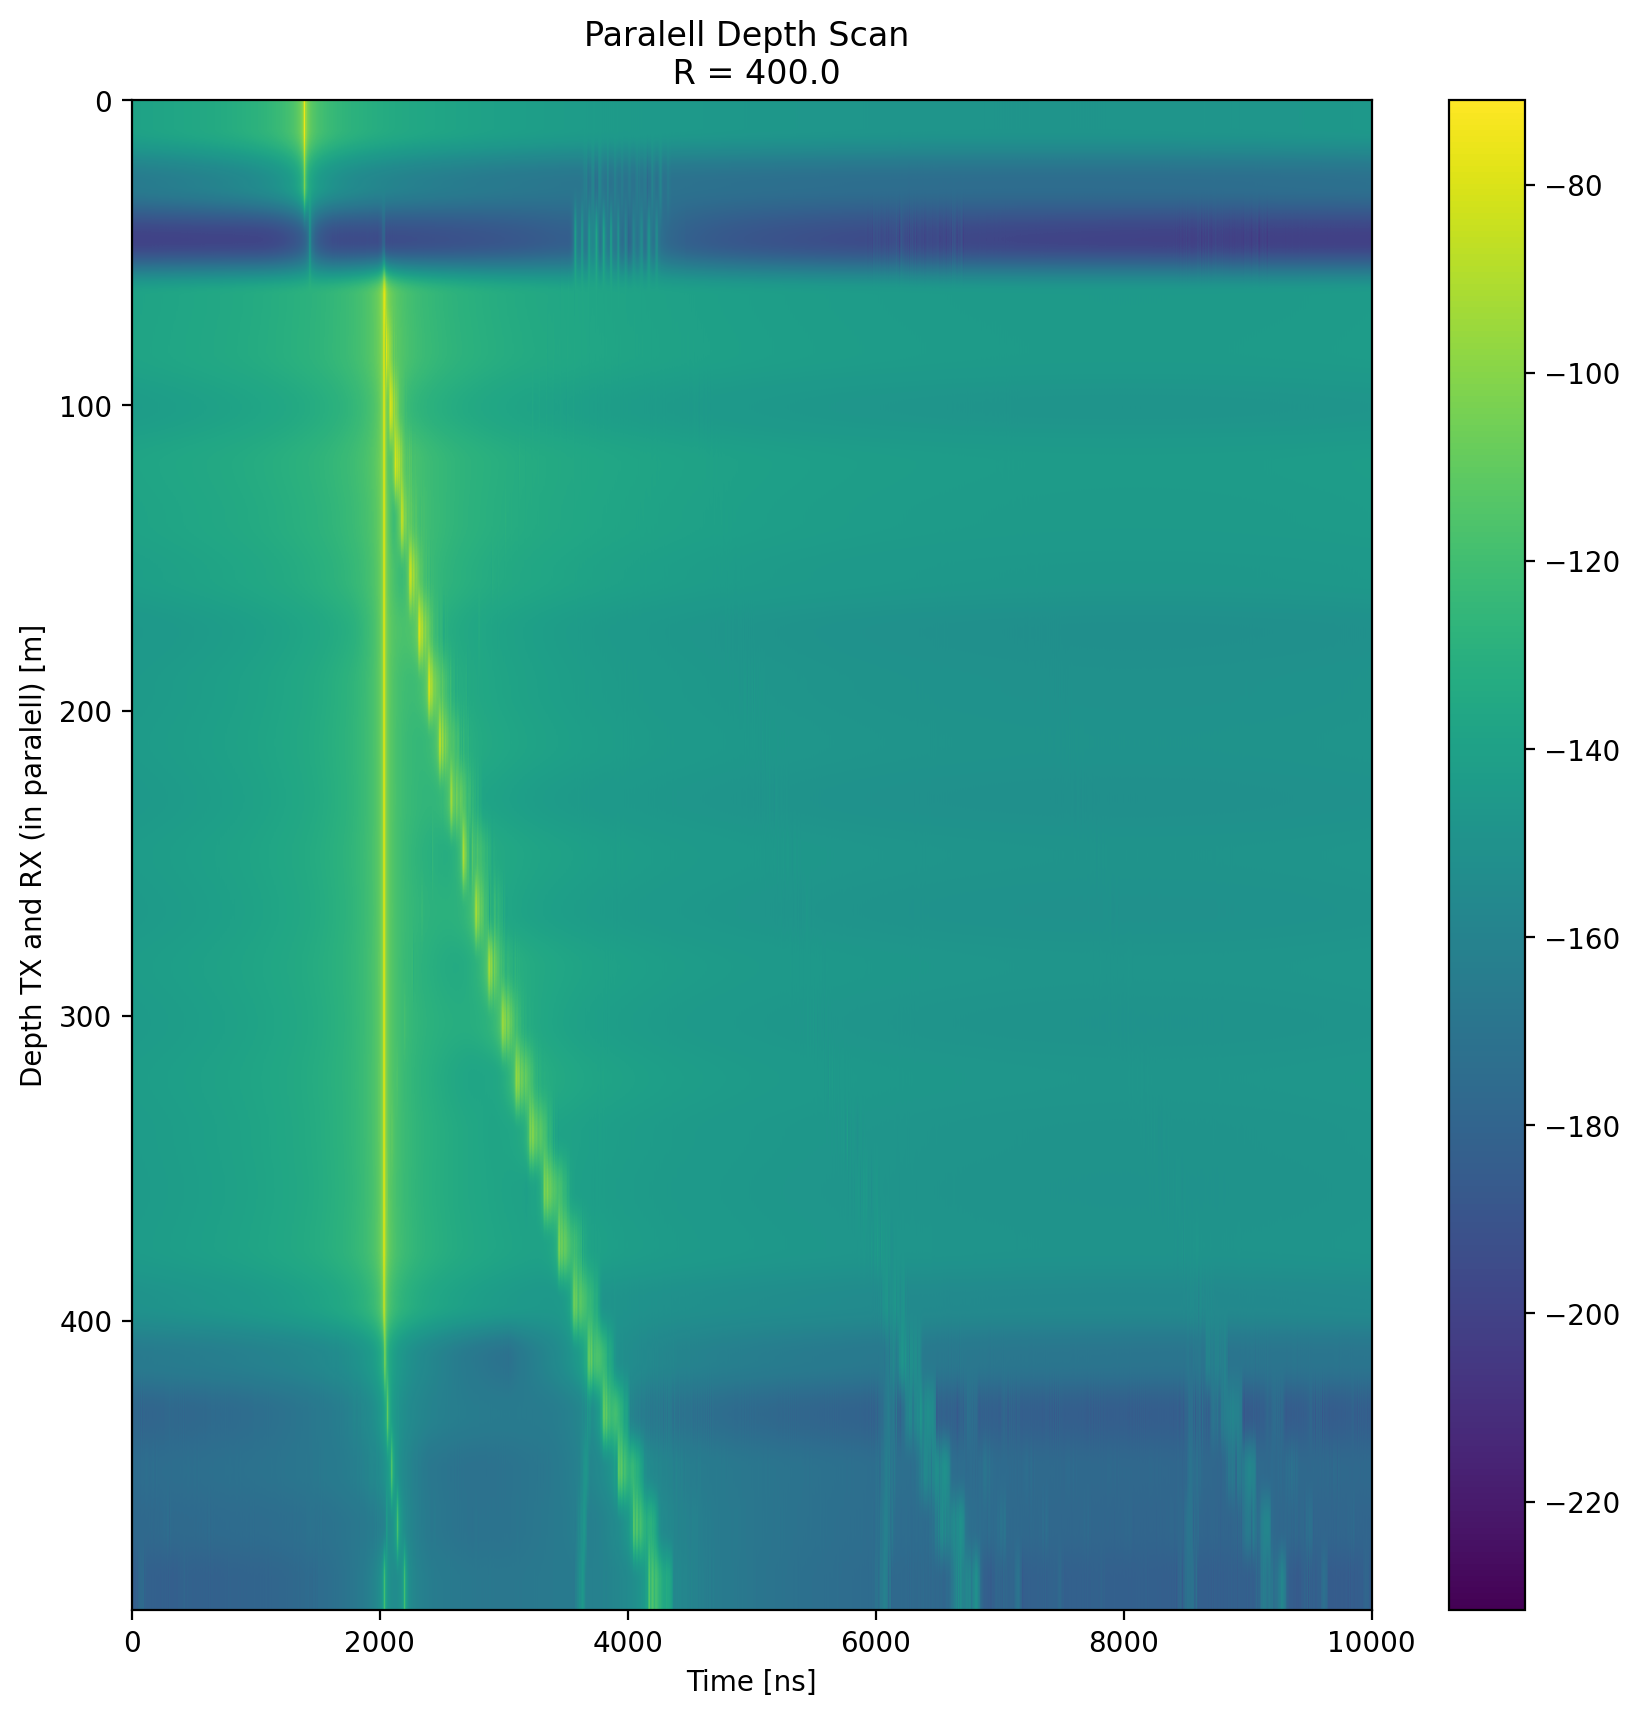

In [122]:
plot_bscan(bscan3, output_h5, R, 10000)

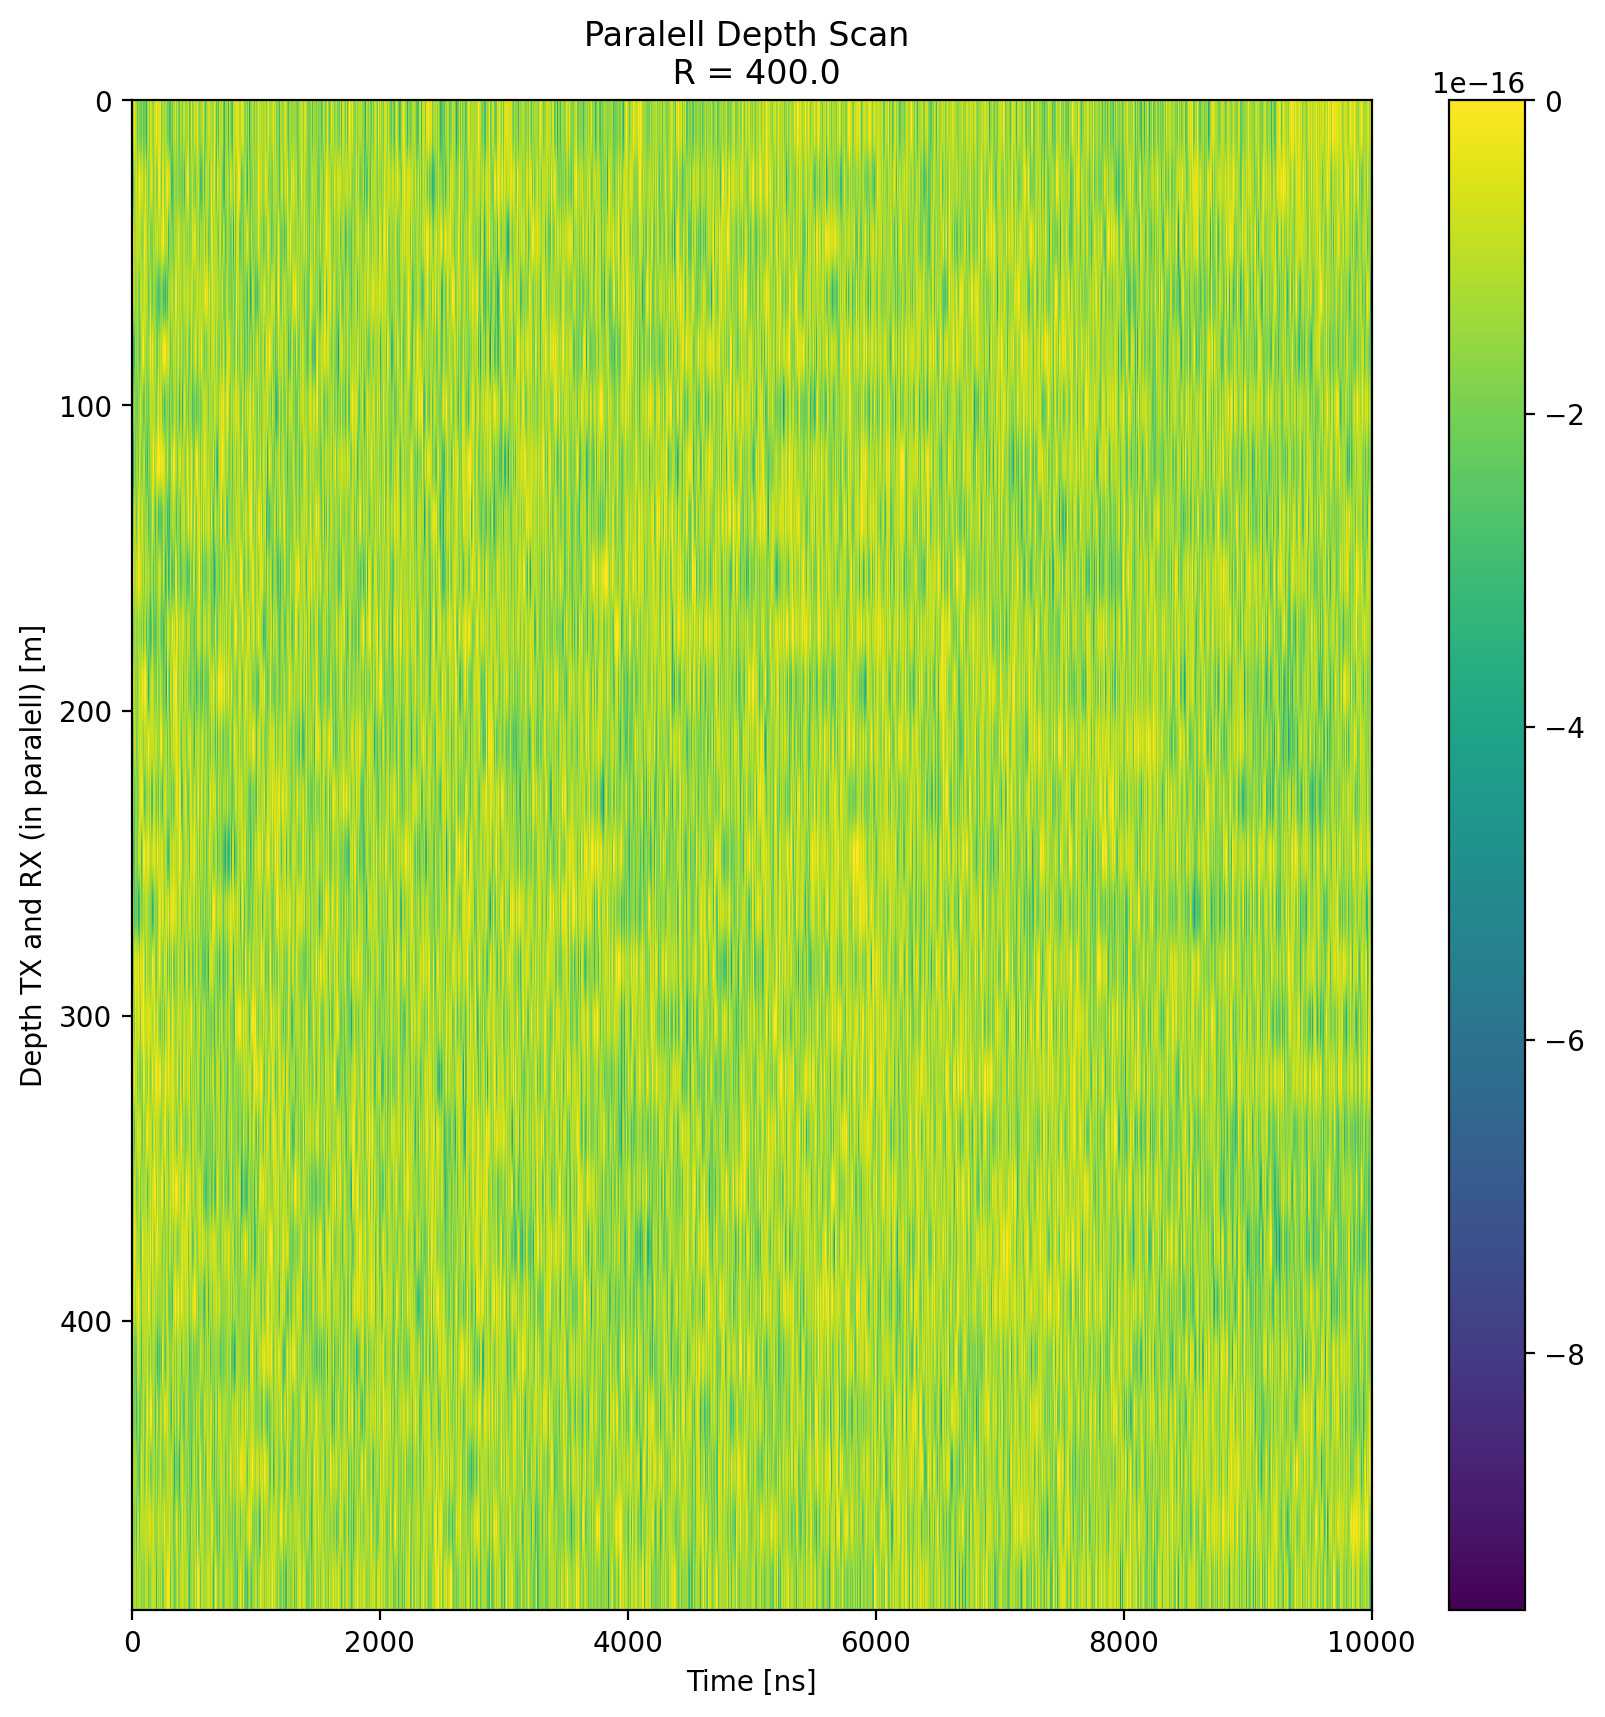

In [123]:
plot_bscan(bscan3/bscan1, output_h5, R, 10000)

Z = 475.0 m R =  400.0 m


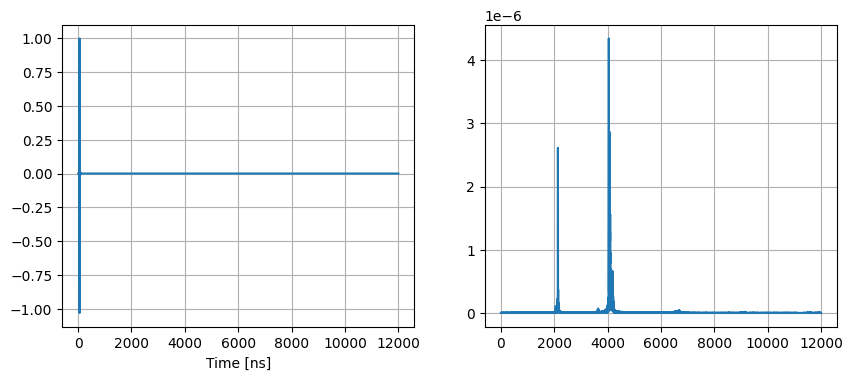

In [29]:
idx_depth = 25
idx_range = 8

spectrum = A3[idx_depth][idx_range][idx_depth]
depth = RX_depths[idx_depth]
rx_range = RX_ranges[idx_range]
print('Z =', depth, 'm R = ', rx_range, 'm')

signal = np.fft.ifft(np.flip(spectrum))

fig = pl.figure(figsize=(10,4), dpi = 100)
ax1.set_title('TX pulse')
ax1 = fig.add_subplot(121)
ax1.plot(time_space, tx_pulse.real)
ax1.set_xlabel('Time [ns]')
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(time_space, abs(signal))
ax2.grid()
ax1.set_xlabel('Time [ns]')
pl.show()

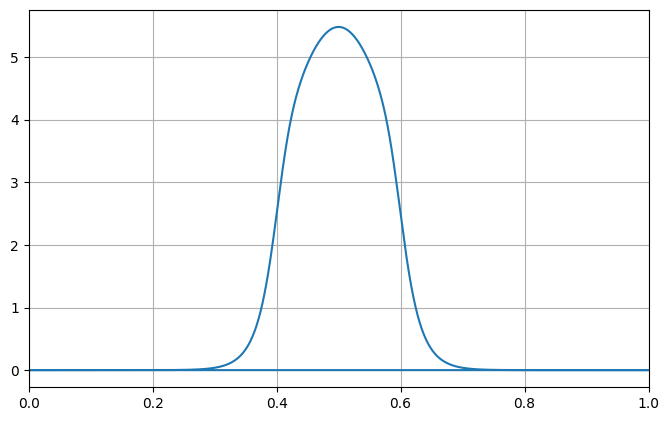

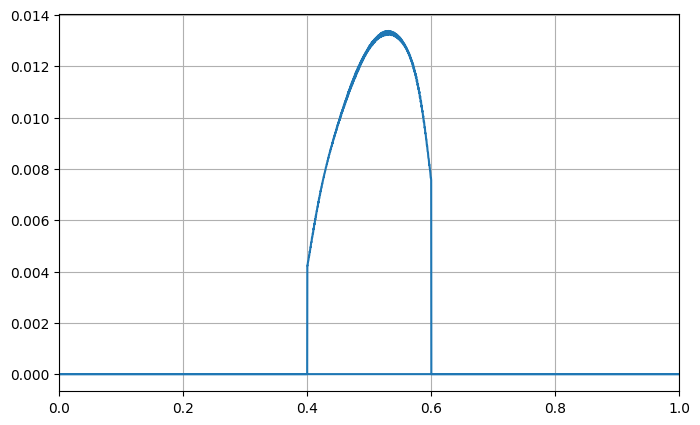

In [6]:
pl.figure(figsize=(8,5),dpi=100)
pl.plot(freq_space, abs(tx_spectrum))
pl.xlim(0,1)
pl.grid()
pl.show()

pl.figure(figsize=(8,5),dpi=100)
pl.plot(freq_space, abs(spectrum))
pl.xlim(0,1)
pl.grid()
pl.show()